In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [39]:
df = pd.read_csv("Data/Penguin/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [41]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# 결측치 제거

In [42]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# 범주형 데이터

In [43]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [44]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [45]:
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [46]:
df['sex'] = df['sex'].replace('.', 'N', regex=False)

In [47]:
df['sex'] = df['sex'].fillna('N')

In [48]:
df['sex'].unique()

array(['MALE', 'FEMALE', 'N'], dtype=object)

In [49]:
df = df.drop(['sex'], axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder

features = ['species', 'island']
for feature in features:
    le = LabelEncoder()
    le_result = le.fit(df[feature])
    df[feature] = le_result.transform(df[feature])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.10000,18.70000,181.000000,3750.000000
1,0,2,39.50000,17.40000,186.000000,3800.000000
2,0,2,40.30000,18.00000,195.000000,3250.000000
3,0,2,43.92193,17.15117,200.915205,4201.754386
4,0,2,36.70000,19.30000,193.000000,3450.000000


# 이상치 제거

In [51]:
df.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.921930,17.151170,200.915205,4201.754386
std,0.893320,0.726194,5.443643,1.969027,14.020657,799.613058
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000


In [52]:
def draw_boxplot(df, columns) :
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[columns])
    plt.show()

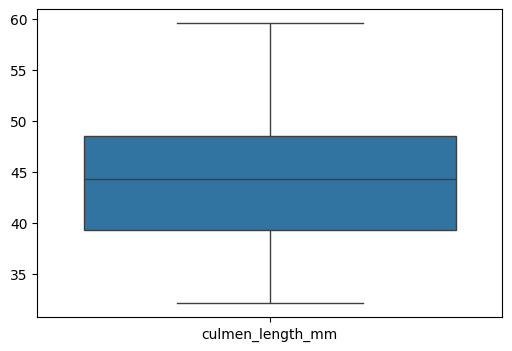

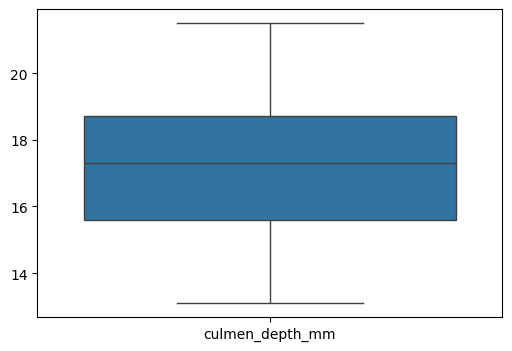

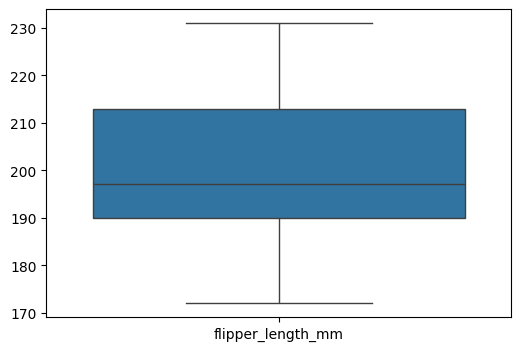

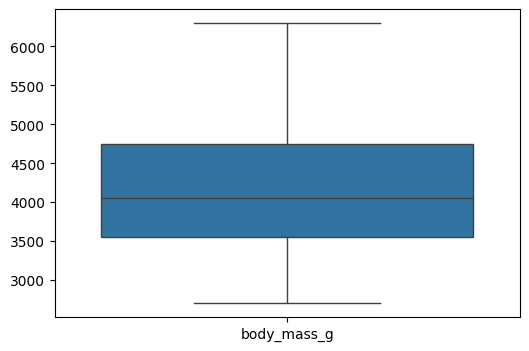

In [53]:
draw_boxplot(df, ['culmen_length_mm'])
draw_boxplot(df, ['culmen_depth_mm'])
draw_boxplot(df, ['flipper_length_mm'])
draw_boxplot(df, ['body_mass_g'])

# 데이터 분석

# 종류별 데이터 수

In [54]:
df['species'].value_counts()

species
0    152
2    124
1     68
Name: count, dtype: int64

## 각 지역별 펭귄 종 수

<Axes: xlabel='island', ylabel='count'>

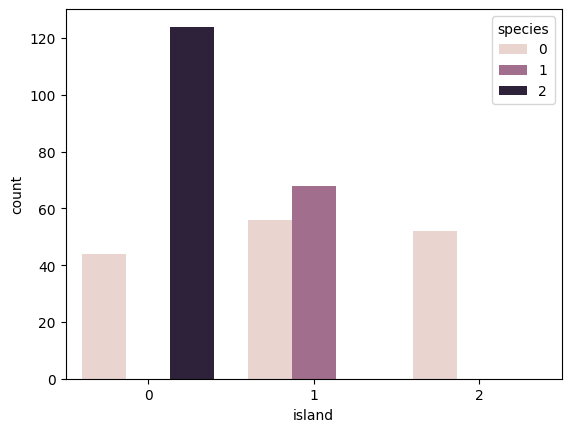

In [55]:
sns.countplot(x='island', hue='species',data=df)

## 상관관계 분석

In [99]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045
culmen_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000


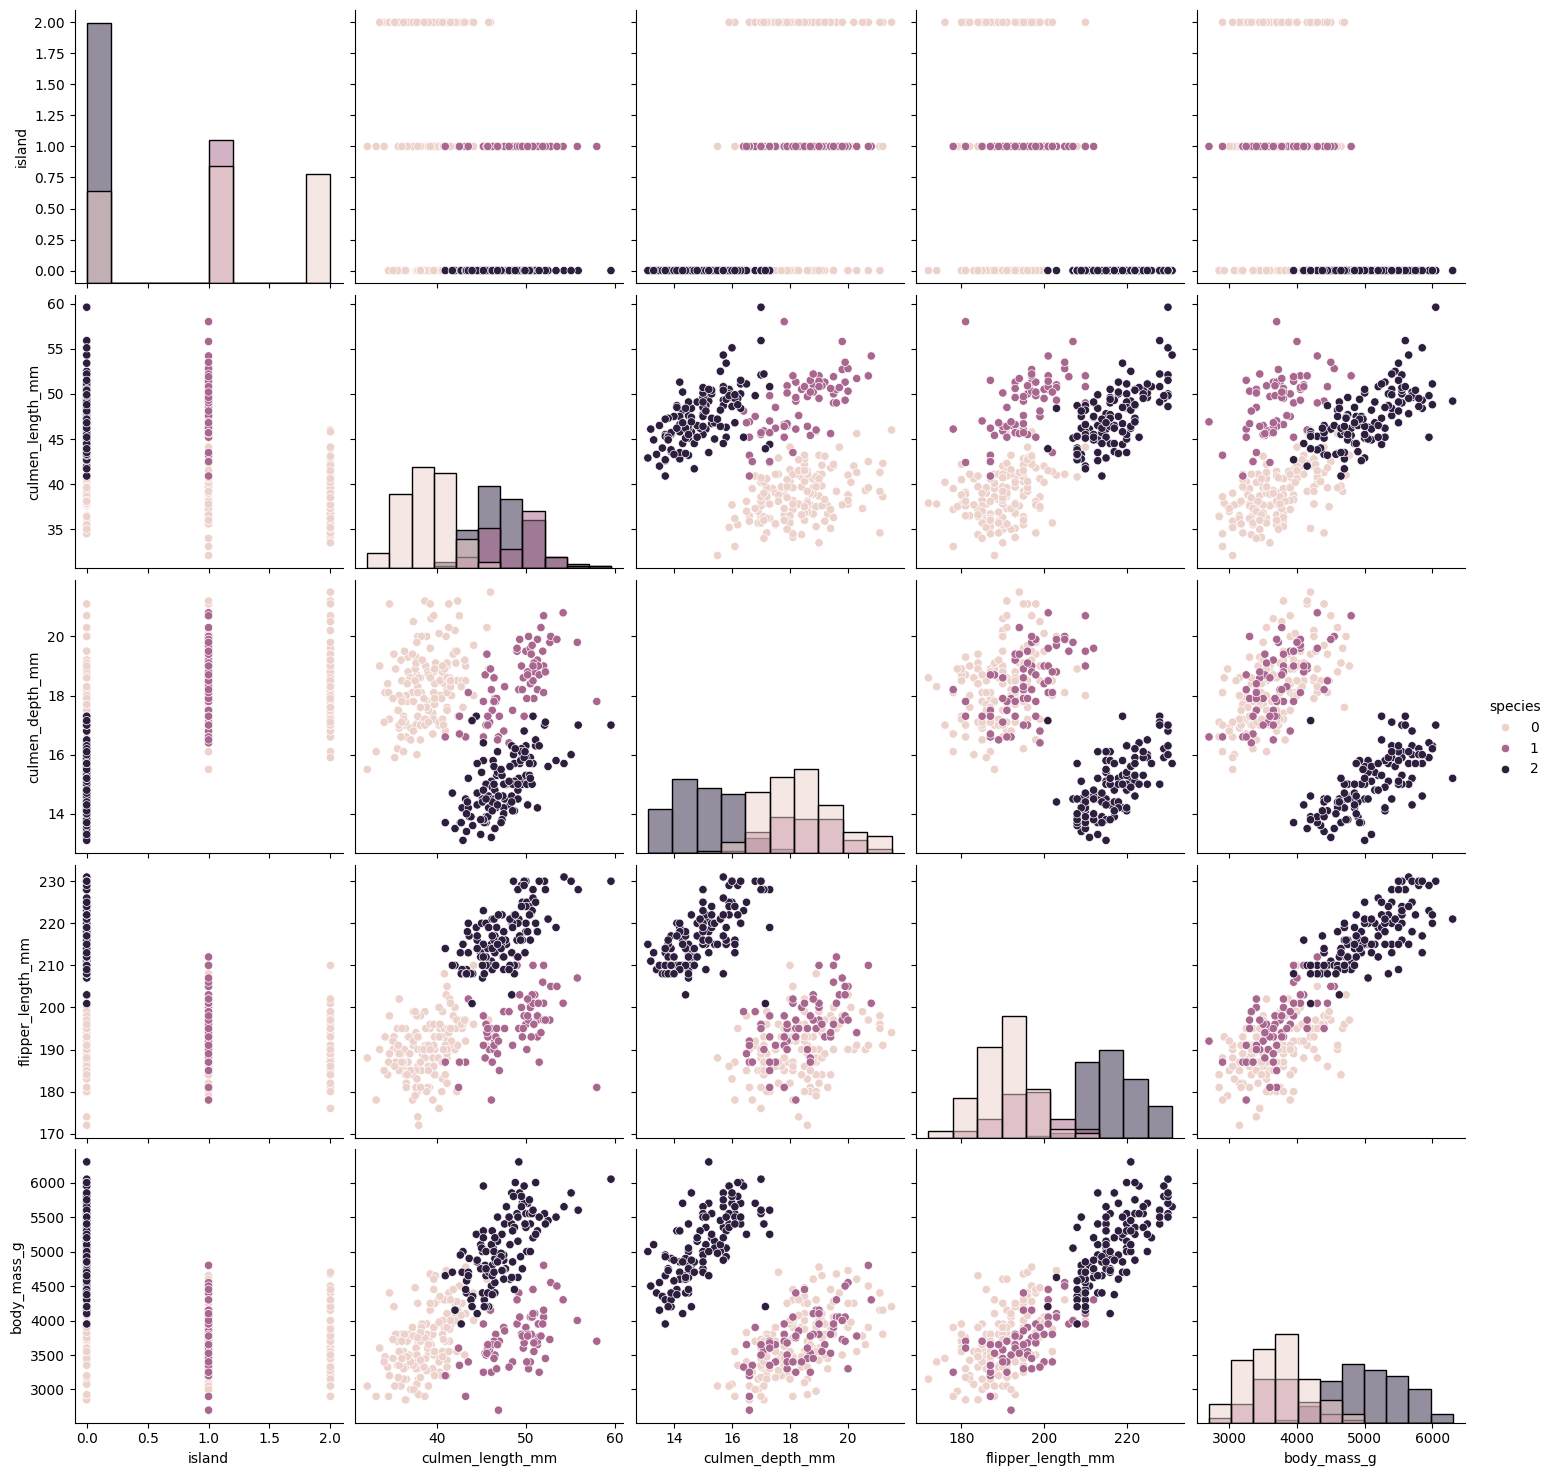

In [56]:
import seaborn as sns
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

# 데이터 분할

In [57]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(275, 5)
(69, 5)
(275,)
(69,)
Counter({0: 122, 2: 99, 1: 54})
Counter({0: 30, 2: 25, 1: 14})


# 분류 모델

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression # 회기 모델 중 > 이진 분류 모델
from sklearn.metrics import accuracy_score

In [59]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

In [68]:
dt_model.fit(X_train, y_train)
dt_result = dt_model.predict(X_test)
accuracy_score(dt_result, y_test)

1.0

In [82]:
rf_model.fit(X_train, y_train)
rf_result = rf_model.predict(X_test)
accuracy_score(rf_result, y_test)

1.0

In [98]:
lr_model.fit(X_train, y_train)
lr_result = lr_model.predict(X_test)
accuracy_score(lr_result, y_test)

0.9855072463768116